In [1]:
# ln -s ../code/relay.py relay.py
%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## The limits of PMFs

In [2]:
live, firsts, others = first.MakeFrames()

In [3]:
first_wgt_nona = firsts.totalwgt_lb.dropna()
other_wgt_nona = others.totalwgt_lb.dropna()

firsts_pmf = thinkstats2.Pmf(first_wgt_nona, label='firsts')
others_pmf = thinkstats2.Pmf(other_wgt_nona, label='others')

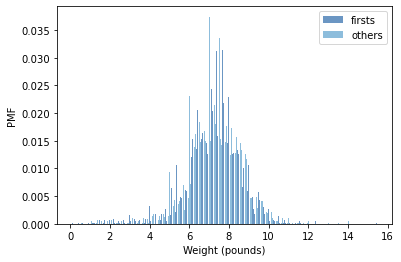

In [4]:
width = 0.4 / 16

thinkplot.PrePlot(2)
thinkplot.Hist(firsts_pmf, align='right', width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

## Percentiles

A **percentile rank** represents the portion of the population at or below a particular cumulative probability.

## CDFs

A **cumulative distribution function** (CDF) maps from a value to its percentile rank.

In [5]:
def EvalCdf(sample, x): # x is any value that might appear in the distribution
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [7]:
test_list = [1,2,2,3,5]
print(EvalCdf(test_list, 0), EvalCdf(test_list, 1),
      EvalCdf(test_list, 2), EvalCdf(test_list, 3),
      EvalCdf(test_list, 4), EvalCdf(test_list, 5))

0.0 0.2 0.6 0.8 0.8 1.0


`thinkstats2` provides a class Cdf that represents CDFs. The fundamental methods provided by Cdf are:
* **`Prob(x)`**. Given a value **x**, computes the probability $p=CDF(x)$.
* **`Value(x)`**. Given a probability **p**, computes the corresponding value **x**.

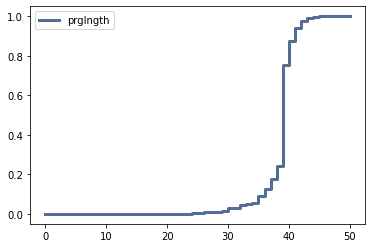

<Figure size 576x432 with 0 Axes>

In [8]:
live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live. prglngth, label='prglngth')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabels='weeks', ylables='CDF')

## Comparing CDFs

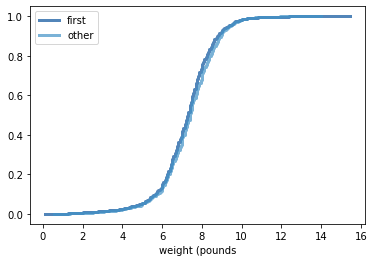

<Figure size 576x432 with 0 Axes>

In [11]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds', ylable='CDF')

## Random numbers

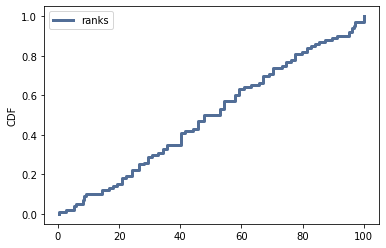

<Figure size 576x432 with 0 Axes>

In [22]:
# Take a random sample of the population of live births and look at percentiles
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

rank_cdf = thinkstats2.Cdf(ranks, label='ranks')
thinkplot.Cdf(rank_cdf)
thinkplot.Show(ylabel='CDF')

The above graph is obvious: it shows that 10% of the sample is below the 10th percentile, and so on.

{'xscale': 'linear', 'yscale': 'linear'}

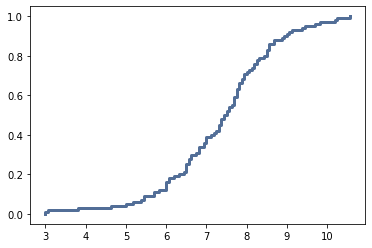

In [20]:
thinkplot.cdf(thinkstats2.Cdf(sample))

In [23]:
rank_cdf.Random()

40.185881832263775

In [24]:
rank_cdf.Sample(10)

array([35.76012392, 26.34432397,  2.64439035, 84.06727152, 34.27749502,
       35.76012392, 27.97079   , 73.32374419, 52.83248506, 95.23124585])

### Comparing percentile ranks

In [26]:
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100.8 * beat / field_size
    return percentile

def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    return position